In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from skimage.morphology import ball, cube, octahedron


def plot_voxels(varray, ax, title):
    ax.view_init(20, 200)
    ax.voxels(varray, edgecolor="k")
    ax.set_title(title, fontsize=30)


def structuring_element(array, structure, position=None, alignment_to_index="center"):
    """Draw a structuring element.

    Parameters
    ----------
    array: ndarray
        An array where the structuring element will be placed.
    structure: ndarray
        A structuring element.
    position: array_like, optional
        The position of the structuring element in the output image.
        When no position is given, the stucuting element will be drawn in the center of the array.
        If one or more array axis haven an even count of total elements and therefore no integer as center index,
        the center index is rounded down to the next integer.
    alignment_to_index: string, optional
        Can be either "center" or "corner".
    """
    if position == None:
        i, j, k = array.shape
        position = np.array(
            [int(np.ceil(i / 2)), int(np.ceil(j / 2)), int(np.ceil(k / 2))]
        )
    x = position[0]
    y = position[1]
    z = position[2]
    strulen_x = structure.shape[0]
    strulen_y = structure.shape[1]
    strulen_z = structure.shape[2]
    if alignment_to_index == "center":
        halfxA = int(np.floor(strulen_x / 2))
        halfxB = int(np.ceil(strulen_x / 2))
        halfyA = int(np.floor(strulen_y / 2))
        halfyB = int(np.ceil(strulen_y / 2))
        halfzA = int(np.floor(strulen_z / 2))
        halfzB = int(np.ceil(strulen_z / 2))
        array[
            x - halfxA : x + halfxB, y - halfyA : y + halfyB, z - halfzA : z + halfzB
        ] = structure
    if alignment_to_index == "corner":
        array[x : x + strulen_x, y : y + strulen_y, z : z + strulen_z] = structure

    return array

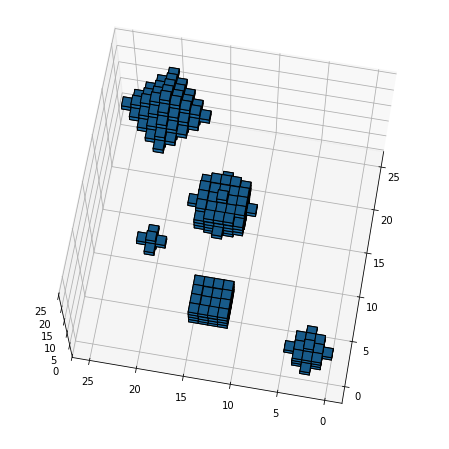

In [30]:
voxelarray = np.full((25, 25, 25), 0)

voxelarray = structuring_element(
    voxelarray, ball(2), position=(0, 0, 0), alignment_to_index="corner"
)
voxelarray = structuring_element(voxelarray, ball(3), alignment_to_index="center")
voxelarray = structuring_element(voxelarray, ball(1), position=(10, 20, 6))
voxelarray = structuring_element(voxelarray, cube(4), position=(4, 13, 10))
voxelarray = structuring_element(voxelarray, octahedron(4), position=(20, 20, 20))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.view_init(70, 190)
ax.voxels(voxelarray, edgecolor="k")
plt.show()

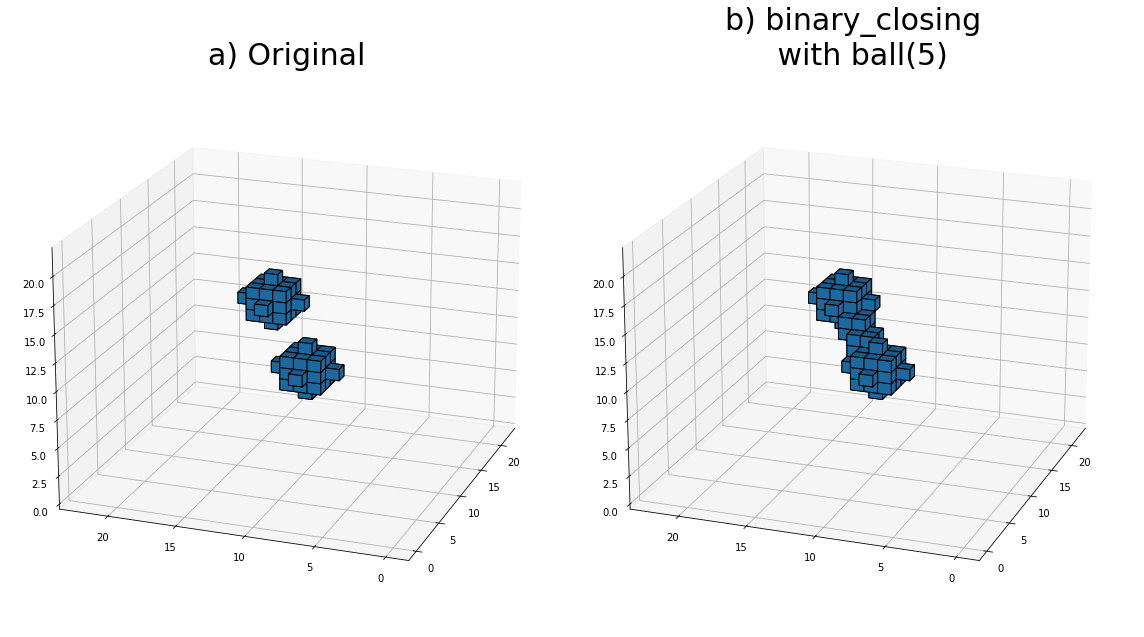

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from skimage.morphology import ball

voxelarray = np.full((22, 22, 22), 0)
voxelarray = structuring_element(voxelarray, ball(2), position=(9, 9, 9))
voxelarray = structuring_element(voxelarray, ball(2), position=(13, 13, 13))

voxelarray2 = scipy.ndimage.binary_closing(voxelarray, ball(5))

fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
plot_voxels(voxelarray, ax1, title="a) Original")
plot_voxels(voxelarray2, ax2, title="b) binary_closing \n with ball(5)")
plt.tight_layout()
plt.show()

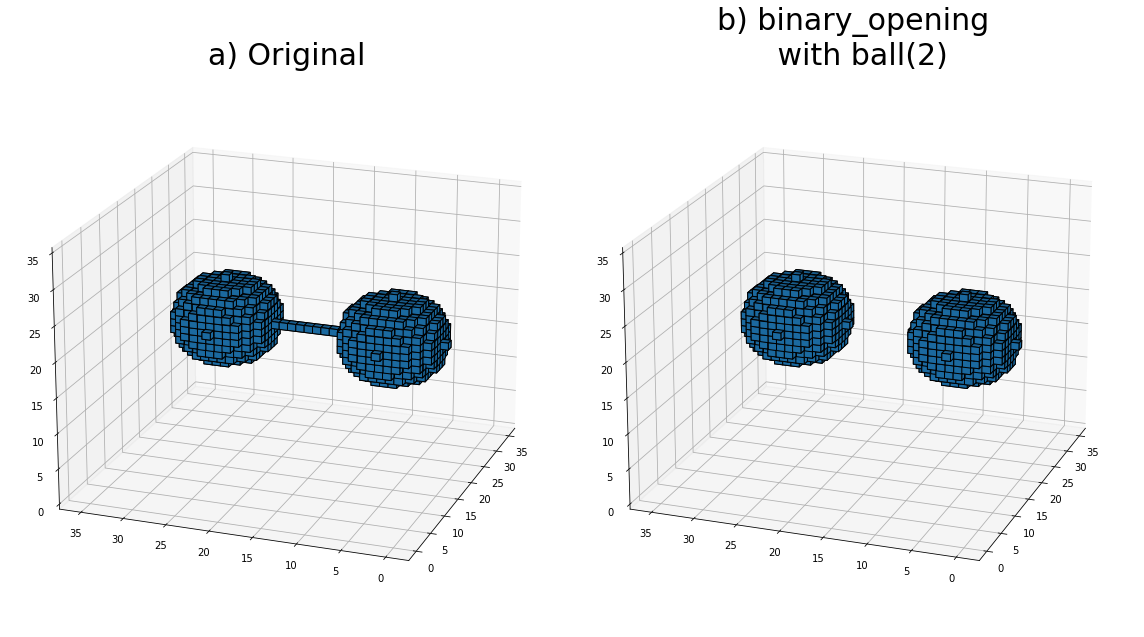

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from skimage.morphology import ball

voxelarray = np.full((35, 35, 35), 0)
voxelarray = structuring_element(voxelarray, ball(6), position=(22, 7, 17))
voxelarray = structuring_element(voxelarray, ball(6), position=(22, 27, 17))
voxelarray[22, 7:27, 17] = 1

voxelarray2 = scipy.ndimage.binary_opening(voxelarray, ball(2))

fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
plot_voxels(voxelarray, ax1, title="a) Original")
plot_voxels(voxelarray2, ax2, title="b) binary_opening \n with ball(2)")
plt.tight_layout()
plt.show()

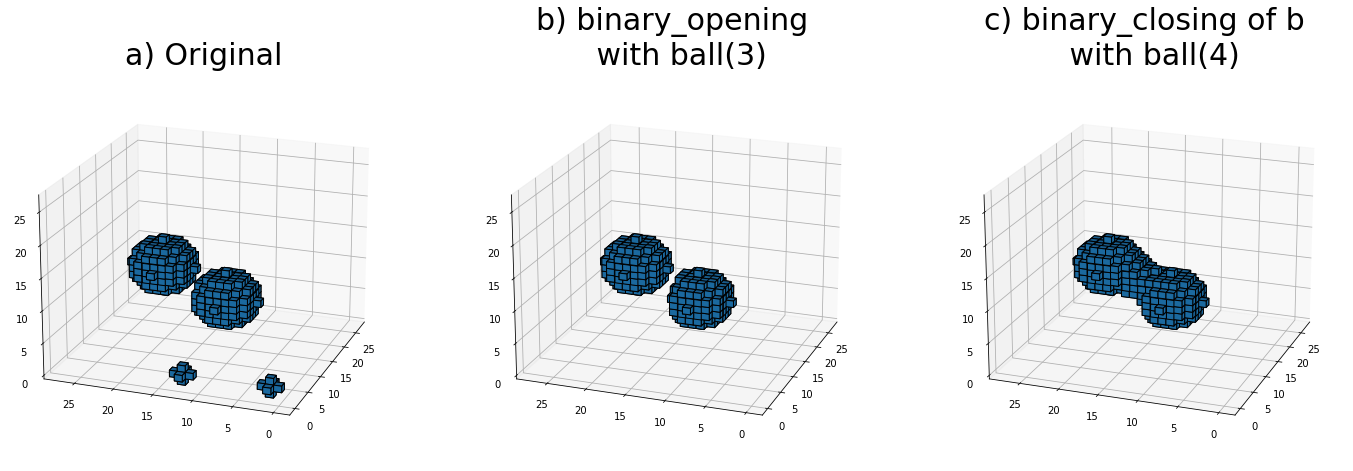

In [40]:
voxelarray = np.full((27, 27, 27), 0)
voxelarray = structuring_element(voxelarray, ball(1), position=(1, 1, 1))
voxelarray = structuring_element(voxelarray, ball(1), position=(1, 12, 1))
voxelarray = structuring_element(voxelarray, ball(4), position=(8, 9, 10))
voxelarray = structuring_element(voxelarray, ball(4), position=(8, 17, 14))

img_morphed = scipy.ndimage.binary_opening(voxelarray, ball(3))
img_morphed2 = scipy.ndimage.binary_closing(img_morphed, ball(4))

fig = plt.figure(figsize=(16 * 1.5, 9 * 1.5))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

plot_voxels(voxelarray, ax1, title="a) Original")
plot_voxels(img_morphed, ax2, title="b) binary_opening \n with ball(3)")
plot_voxels(img_morphed2, ax3, title="c) binary_closing of b \n with ball(4)")

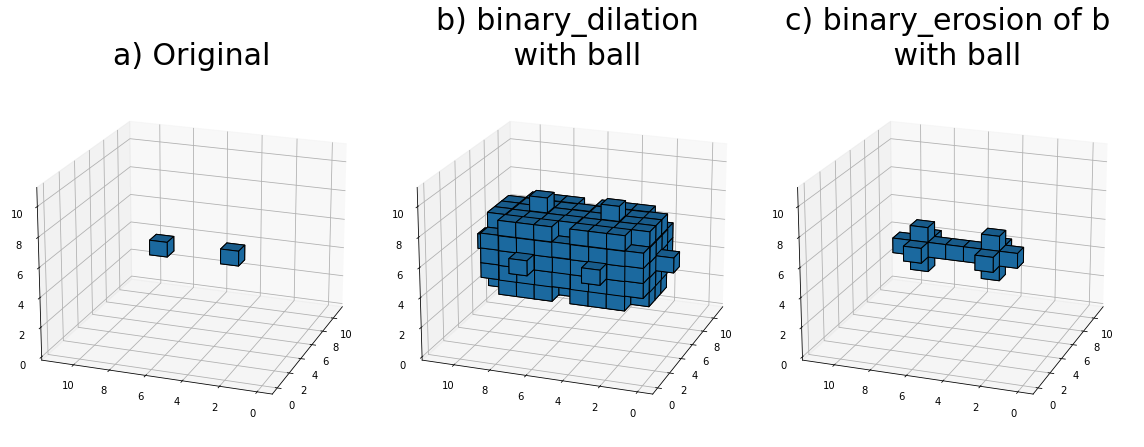

In [41]:
voxelarray = np.full((11, 11, 11), 0)
voxelarray[5, 3, 5] = 1
voxelarray[5, 7, 5] = 1


img_morphed = scipy.ndimage.binary_dilation(voxelarray, ball(3))
img_morphed2 = scipy.ndimage.binary_erosion(img_morphed, ball(2))


fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
plot_voxels(voxelarray, ax1, title="a) Original")
plot_voxels(img_morphed, ax2, title="b) binary_dilation \n with ball")
plot_voxels(img_morphed2, ax3, title="c) binary_erosion of b \n with ball")
plt.tight_layout()
plt.show()